# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT DATA

In [71]:
#CHANGE folder  
os.chdir("/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/Combustion_Cars")

if True: #Load all csv files in directory and concat just once 
    extension = 'csv'

    #Car trips
    car_trips_filenames = [i for i in glob.glob('car_trip_event*.{}'.format(extension))]
    car_trips_df_temp= pd.concat([pd.read_csv(f) for f in car_trips_filenames ])
    
    #Car refilling
    car_refilling_filenames = [i for i in glob.glob('Car_fuel_refilling*.{}'.format(extension))]
    car_refilling_df_temp= pd.concat([pd.read_csv(f) for f in car_refilling_filenames ])
    
    #Car roads traveled
    car_roads_filenames = [i for i in glob.glob('car_roadstraveled*.{}'.format(extension))]
    car_roads_df_temp= pd.concat([pd.read_csv(f) for f in car_roads_filenames ])
    
    #Package events
    package_events_filenames =[i for i in glob.glob('package_event*.{}'.format(extension))]
    package_events_df_temp= pd.concat([pd.read_csv(f) for f in package_events_filenames ])
    
    #Package trips
    package_trips_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    package_trips_df_temp= pd.concat([pd.read_csv(f) for f in package_trips_filenames ])
  
filepath_demand = "/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/"
demand_df = pd.read_csv(filepath_demand + 'fooddeliverytrips_cambridge.csv')

In [72]:
filepath_demand = "/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/"
demand_df = pd.read_csv(filepath_demand + 'fooddeliverytrips_cambridge.csv')

In [73]:
# Prepare DataFrames
car_trips_df=car_trips_df_temp.copy()
car_refilling_df=car_refilling_df_temp.copy()
car_roads_df=car_roads_df_temp.copy()
package_events_df=package_events_df_temp.copy()
package_trips_df=package_trips_df_temp.copy()

# READ DATA

In [74]:
print("---Car trips---")
# car_drop_list=['Num Dockless Bikes', 'Num Scooters','Num eBikes', 'Num Conventional Bikes']
# car_trips_df=car_trips_df.drop(car_drop_list,axis=1)
car_trips_df.head(3)

---Car trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Event,Message,Start Time,End Time,Duration (min),Distance Traveled,Start Fuel %,End Fuel %,Fuel Gain %
0,0,00:00:00,True,200,50000.0,2.222222,75,car0,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,00:00:00,True,200,50000.0,2.222222,75,car1,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,00:00:00,True,200,50000.0,2.222222,75,car2,START: wandering,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
print("---Car refilling trips---")
# car_drop_list=['Num Dockless Bikes', 'Num Scooters','Num eBikes','Num Conventional Bikes']
# car_refilling_df=car_refilling_df.drop(car_drop_list,axis=1)
car_refilling_df.head(3)

---Car refilling trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Gas Station,Start Time,End Time,Duration (min),Start Fuel %,End Fuel %,Fuel Gain %
0,13688,07:36:16,True,200,50000.0,2.222222,65,car57,gasstation[6],07:33:42,07:36:16,2.566667,14.581320,100.0,85.418680
1,23592,13:06:24,True,200,50000.0,2.222222,65,car6,gasstation[4],13:03:50,13:06:24,2.566667,14.658259,100.0,85.341741
2,24351,13:31:42,True,200,50000.0,2.222222,65,car18,gasstation[5],13:29:06,13:31:42,2.600000,13.541107,100.0,86.458893


In [76]:
print("---Car roads traveled---")
# car_drop_list=['Num Dockless Bikes', 'Num Scooters','Num eBikes','Num Conventional Bikes']
# car_roads_df=car_roads_df.drop(car_drop_list,axis=1)
car_roads_df.head(3)

---Car roads traveled---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Distance Traveled
0,0,00:00:00,True,200,50000.0,2.222222,50,car0,0.0
1,0,00:00:00,True,200,50000.0,2.222222,50,car1,0.0
2,0,00:00:00,True,200,50000.0,2.222222,50,car2,0.0


In [77]:
print("---Package events---")
# package_event_drop_list=['Num Dockless Bikes', 'Num Scooters','Num eBikes', 'Num Conventional Bikes']
# package_events_df=package_events_df.drop(package_event_drop_list,axis=1)
package_events_df.head(3)

---Package events---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Event,Mode,Message,Start Time,End Time,Duration (min),Distance (m)
0,0,00:00:00,True,200,50000.0,2.222222,40,package0,START: generated,nil,NaN,NaN,NaN,NaN,NaN
1,0,00:00:00,True,200,50000.0,2.222222,40,package1,START: generated,nil,NaN,NaN,NaN,NaN,NaN
2,0,00:00:00,True,200,50000.0,2.222222,40,package2,START: generated,nil,NaN,NaN,NaN,NaN,NaN


In [78]:
print("---Package trips---")
# package_trip_drop_list=['Num Dockless Bikes', 'Num Scooters','Num eBikes', 'Num Conventional Bikes']
# package_trips_df=package_trips_df.drop(package_trip_drop_list,axis=1)
package_trips_df.head(3)

---Package trips---


,Cycle,Time,Traditional Scenario,Num Autonomous Bikes,Autonomous Bikes Battery Life,AB PickUp Speed,Num Cars,Agent,Trip Served,Mode,Wait Time (min),Departure Time,Arrival Time,Duration (min),Origin [lat],Origin [lon],Destination [lat],Destination [lon],Distance (m)
0,899,00:29:58,True,200,50000.0,2.222222,55,package0,True,2,0.8,00:21:50,00:29:58,8.133333,-71.086885,42.372127,-71.123928,42.388293,3572.407064
1,1808,01:00:16,True,200,50000.0,2.222222,55,package1,True,2,0.6,00:59:38,01:00:16,0.633333,-71.118519,42.370282,-71.119940,42.372069,245.029469
2,1862,01:02:04,True,200,50000.0,2.222222,55,package2,True,2,1.0,01:00:02,01:02:04,2.033333,-71.119396,42.373092,-71.113837,42.377690,744.582664


# ANALYZE RESULTS

## Package events || Trips Served


### Preliminary Code

In [79]:
# Analyzed fleet sizes of the batch experiment
n_cars_possible=package_trips_df['Num Cars'].unique()
l_n_cars=len(n_cars_possible)

In [80]:
# Generation of the serve trips table
served_trips_df = pd.DataFrame(n_cars_possible)
served_trips_df=served_trips_df.rename(columns={0: "Num Cars"}, errors="raise")
served_trips_df['% trips served']=' '

In [81]:
# Generation of the auxiliar array for results
n_cars_possible_df=pd.DataFrame(n_cars_possible)
aux_array = pd.array(['Event Description / Num Cars'])
aux_array_df = pd.DataFrame(aux_array)
aux_array_df = pd.concat([aux_array_df,n_cars_possible_df])
aux_array_df = aux_array_df.rename(columns={0: "Index"}, errors="raise")

In [82]:
# Generation of the events table for every fleet size
package_events_analysis_df = pd.DataFrame(columns=aux_array_df['Index'])
package_events_analysis_df['Event Description / Num Cars']=package_events_df['Event'].unique()
package_events_analysis_df.at[13,'Event Description / Num Cars'] = 'Percentage of trips served: '

### Trips Served

In [83]:
# Fulfill the generated event table: number of trips with specifications
for i in range(l_n_cars):
    p_trips=package_events_df[package_events_df['Num Cars']==n_cars_possible[i]]
    lp_trips=len(p_trips)

    li = list(p_trips['Agent'].value_counts())

    events_count = p_trips['Event'].value_counts()
    events_count = pd.DataFrame(events_count).reset_index()
    events_count = events_count.rename(columns={"index": "Event Description / Num Cars"}, errors="raise")
   

    trips_served = events_count.at[12,'Event']
    total_trips = len(li)
    p_trips_served = trips_served/total_trips*100

    events_count.at[13,'Event Description / Num Cars'] = 'Percentage of trips served: '
    events_count.at[13,'Event'] = p_trips_served

    served_trips_df.at[i,'% trips served'] = p_trips_served

    package_events_analysis_df[n_cars_possible[i]]=events_count['Event']
    package_events_analysis_df=package_events_analysis_df.round(2)

# Traspose table for future printing
p_events_transp = package_events_analysis_df.transpose()
p_events_transp = p_events_transp.reset_index()

headers = p_events_transp.iloc[0]
new_p_events_transp  = pd.DataFrame(p_events_transp.values[1:], columns=headers)
new_p_events_transp = new_p_events_transp.sort_values(by=['Event Description / Num Cars']).reset_index().drop('index',axis=1)

Minimum fleet to serve 100% of the trips:  35  cars


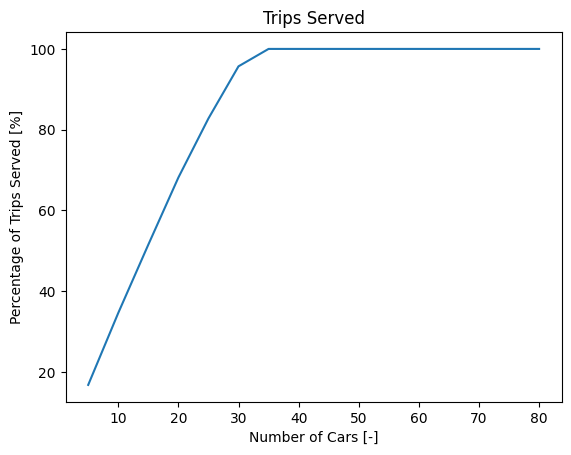

In [84]:
for i in range(len(new_p_events_transp)):
  analysis = new_p_events_transp.at[i,'Percentage of trips served: ']
  if analysis >= 100:
    fleet_serve = new_p_events_transp.at[i,'Event Description / Num Cars']
    break
print('Minimum fleet to serve 100% of the trips: ', fleet_serve, ' cars')

plt.title('Trips Served')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Percentage of Trips Served [%]') 
plt.plot(new_p_events_transp['Event Description / Num Cars'],new_p_events_transp['Percentage of trips served: '])

In [85]:
# results_path=Path('/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/2022-09-01 17.45.00/car_trips_served.csv')
# new_p_events_transp.to_csv(results_path,index=False)

## Package Event || Quality of the Service

### Preliminary Code


In [86]:
# Add column of full waiting time = pick up time + delivery time
package_trips_df['Total Time (min)']=package_trips_df['Wait Time (min)']+package_trips_df['Duration (min)']

In [87]:
n_cars_possible=package_trips_df['Num Cars'].unique()
n_cars_possible.sort()
l_n_cars=len(n_cars_possible)

In [88]:
late_trips_df = pd.DataFrame()
late_trips_df['Num Cars'] = ' '

In [89]:
quality_of_service_list = ['Num Cars','Total packages','Total trips','On time trips','% On time trips','Late trips','% Late trips','Max wait time','Min wait time','Average wait time','Median wait time','Standard Deviation']
quality_of_service_df = pd.DataFrame(columns=quality_of_service_list)

In [90]:
for i in range(l_n_cars):
    p_trips=package_trips_df[package_trips_df['Num Cars']==n_cars_possible[i]]
    l_trips=len(p_trips)

    quality_of_service_df.at[i,'Num Cars'] = n_cars_possible[i]
    quality_of_service_df.at[i,'Total packages'] = len(package_events_df['Agent'].unique())
    quality_of_service_df.at[i,'Total trips'] = l_trips

    package_trips_ontime = p_trips.loc[(p_trips['Total Time (min)']<= 40)]
    package_trips_late = p_trips.loc[(p_trips['Total Time (min)']> 40)]

    quality_of_service_df.at[i,'On time trips'] = package_trips_ontime.shape[0]
    quality_of_service_df.at[i,'Late trips'] = package_trips_late.shape[0]

    ontime_pct=package_trips_ontime.shape[0]/l_trips*100
    late_pct=package_trips_late.shape[0]/l_trips*100

    quality_of_service_df.at[i,'% On time trips'] = ontime_pct
    quality_of_service_df.at[i,'% Late trips'] = late_pct

    total_wait= p_trips['Total Time (min)'].sum()
    average_wait=total_wait/(p_trips.shape[0])

    quality_of_service_df.at[i,'Average wait time'] = average_wait
    quality_of_service_df.at[i,'Max wait time'] = p_trips['Total Time (min)'].max()
    quality_of_service_df.at[i,'Min wait time'] = p_trips['Total Time (min)'].min()
    quality_of_service_df.at[i,'Median wait time'] = p_trips['Total Time (min)'].median()
    quality_of_service_df.at[i,'Standard Deviation'] = p_trips['Total Time (min)'].std()

    quantile_series = p_trips['Total Time (min)'].sort_values().reset_index().drop('index',axis=1)

    quality_of_service_df.at[i,'0 percentile wait time'] = np.percentile(quantile_series, 0)
    quality_of_service_df.at[i,'95 percentile wait time'] = np.percentile(quantile_series, 95)

    quality_of_service_df=quality_of_service_df.round(2)

    late_trips = len(package_trips_late)

    late_trips_df.at[i,'Num Cars'] = n_cars_possible[i]
    late_trips_df.at[i,'% Late Trips'] = late_pct

### Percentage of On Time Trips

Minimum fleet to serve 95% of the trips ON TIME:  40  cars


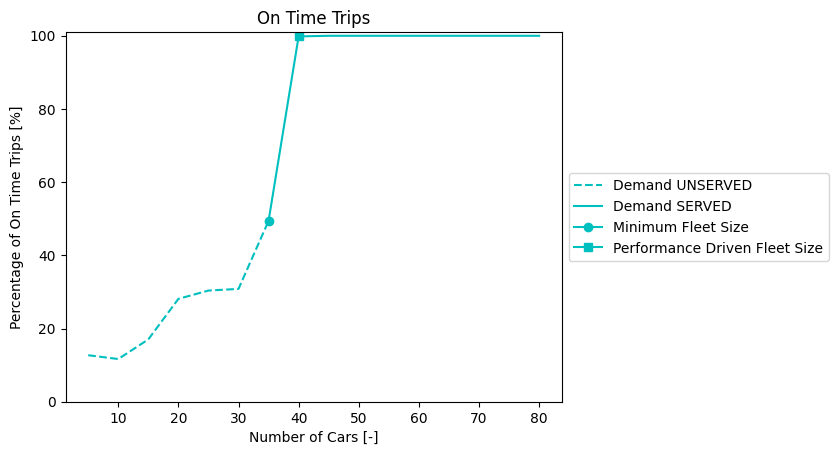

In [91]:
for i in range(len(quality_of_service_df)):
  analysis = quality_of_service_df.at[i,'% Late trips']
  if fleet_serve==quality_of_service_df.at[i,'Num Cars']:
    pos = i
    unserved_df = late_trips_df[:pos+1]
    served_df = late_trips_df[pos:]
    x_value_1 = late_trips_df.at[i,'Num Cars']
    y_value_1 = 100 - late_trips_df.at[i,'% Late Trips']
  if analysis <= 5:
    fleet_quality = quality_of_service_df.at[i,'Num Cars']
    x_value_2 = late_trips_df.at[i,'Num Cars']
    y_value_2 = 100 - late_trips_df.at[i,'% Late Trips']
    break

print('Minimum fleet to serve 95% of the trips ON TIME: ', fleet_quality, ' cars')

plt.ylim([0, 101])
plt.title('On Time Trips')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Percentage of On Time Trips [%]') 
plt.plot(unserved_df['Num Cars'],100-unserved_df['% Late Trips'],'--',color = 'c',label= 'Demand UNSERVED')
plt.plot(served_df['Num Cars'],100-served_df['% Late Trips'],'-',color = 'c',label= 'Demand SERVED')
plt.plot(x_value_1,y_value_1,color = 'c',marker='o',label="Minimum Fleet Size")
plt.plot(x_value_2,y_value_2,color = 'c',marker='s',label="Performance Driven Fleet Size")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

In [92]:
# results_path=Path('/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/2022-09-01 17.45.00/car_quality_service.csv')
# quality_of_service_df.to_csv(results_path,index=False)

### Average Wait Time


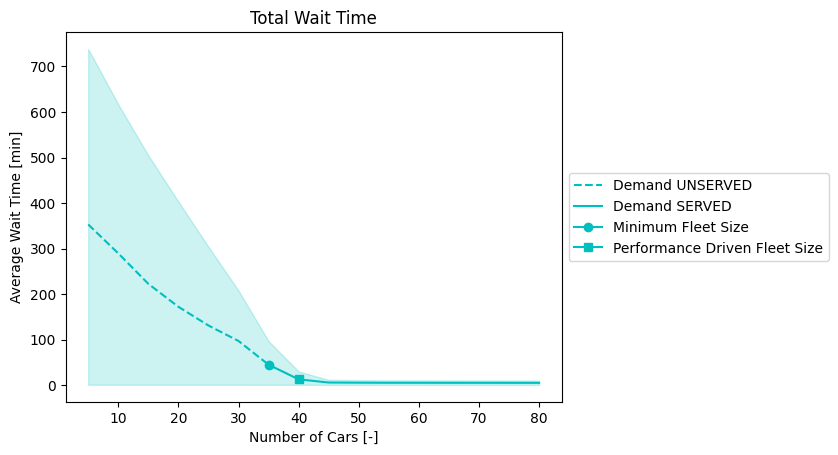

In [93]:
l_quality_service = len(quality_of_service_df)

for i in range(l_quality_service):

    n_cars=n_cars_possible[i]
    temp=quality_of_service_df.loc[(quality_of_service_df['Num Cars']==n_cars)]
    avg_wait = quality_of_service_df[['Num Cars','Average wait time']].reset_index().drop('index',axis=1)
    p0_wait = quality_of_service_df[['Num Cars','0 percentile wait time']].reset_index().drop('index',axis=1)
    p95_wait = quality_of_service_df[['Num Cars','95 percentile wait time']].reset_index().drop('index',axis=1)
    std_dev = quality_of_service_df[['Num Cars','Standard Deviation']].reset_index().drop('index',axis=1)

    if fleet_serve==avg_wait.at[i,'Num Cars']:
      pos = i
      avg_wait_unserved_df = avg_wait[:pos+1]
      avg_wait_served_df = avg_wait[pos:]
      x_value_1 = avg_wait.at[i,'Num Cars']
      y_value_1 = avg_wait.at[i,'Average wait time']
    if avg_wait.at[i,'Num Cars']==fleet_quality:
      x_value_2 = avg_wait.at[i,'Num Cars']
      y_value_2 = avg_wait.at[i,'Average wait time']

x = np.array(avg_wait['Num Cars'].astype(int))
mean = np.array(avg_wait['Average wait time'].astype(float))
error = np.array(std_dev['Standard Deviation'].astype(float))

p0_value = p0_wait['0 percentile wait time']
p95_value = p95_wait['95 percentile wait time']

plt.title('Total Wait Time')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Average Wait Time [min]') 
plt.plot(avg_wait_unserved_df['Num Cars'],avg_wait_unserved_df['Average wait time'],'--',color = 'c',label= 'Demand UNSERVED')
plt.plot(avg_wait_served_df['Num Cars'],avg_wait_served_df['Average wait time'],'-',color = 'c',label= 'Demand SERVED')
plt.plot(x_value_1,y_value_1,color = 'c',marker='o',label="Minimum Fleet Size")
plt.plot(x_value_2,y_value_2,color = 'c',marker='s',label="Performance Driven Fleet Size")
plt.fill_between(x, p0_value, p95_value, color = 'c', alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

### Median Wait Time

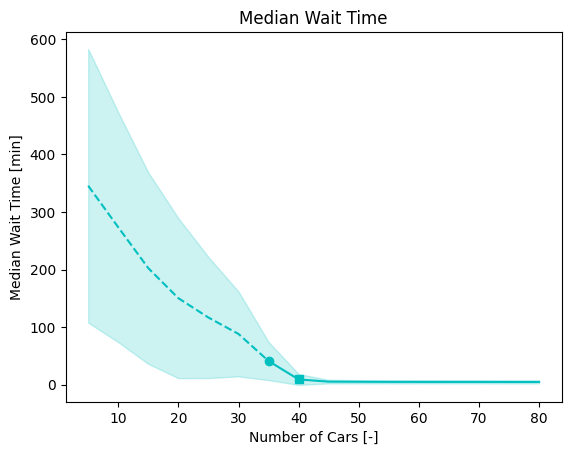

In [94]:
l_quality_service = len(quality_of_service_df)

for i in range(l_quality_service):

    n_cars=n_cars_possible[i]
    temp=quality_of_service_df.loc[(quality_of_service_df['Num Cars']==n_cars)]
    median_wait = quality_of_service_df[['Num Cars','Median wait time']].reset_index().drop('index',axis=1)
    std_dev = quality_of_service_df[['Num Cars','Standard Deviation']].reset_index().drop('index',axis=1)

    if fleet_serve==avg_wait.at[i,'Num Cars']:
      pos = i
      median_wait_unserved_df = median_wait[:pos+1]
      median_wait_served_df = median_wait[pos:]
      x_value_1 = median_wait.at[i,'Num Cars']
      y_value_1 = median_wait.at[i,'Median wait time']
    if median_wait.at[i,'Num Cars']==fleet_quality:
      x_value_2 = median_wait.at[i,'Num Cars']
      y_value_2 = median_wait.at[i,'Median wait time']

x = np.array(avg_wait['Num Cars'].astype(int))
mean = np.array(median_wait['Median wait time'].astype(float))
error = np.array(std_dev['Standard Deviation'].astype(float))

plt.title('Median Wait Time')
plt.xlabel('Number of Cars [-]') 
plt.ylabel('Median Wait Time [min]') 
plt.plot(median_wait_unserved_df['Num Cars'],median_wait_unserved_df['Median wait time'],'--',color = 'c',label= 'Demand UNSERVED')
plt.plot(median_wait_served_df['Num Cars'],median_wait_served_df['Median wait time'],'-',color = 'c',label= 'Demand SERVED')
plt.plot(x_value_1,y_value_1,color = 'c',marker='o',label="Minimum Fleet Size")
plt.plot(x_value_2,y_value_2,color = 'c',marker='s',label="Performance Driven Fleet Size")
plt.fill_between(x, mean - error, mean + error, color = 'c', alpha=0.2)

### Number of Trips per Wait Time


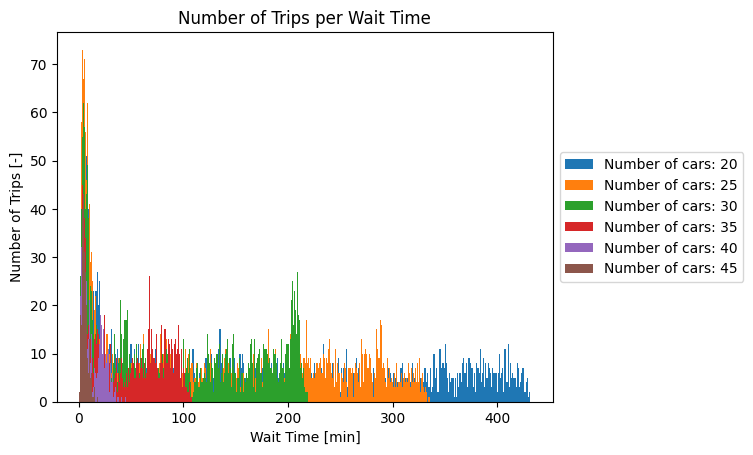

In [95]:
for i in range(6):
    n_cars=n_cars_possible[i+3]
    temp=package_trips_df.loc[(package_trips_df['Num Cars']==n_cars)]
    
    name = 'Number of cars: ' + str(n_cars)
    plt.hist(temp['Total Time (min)'],400,label=name)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

plt.title('Number of Trips per Wait Time')
plt.xlabel('Wait Time [min]') 
plt.ylabel('Number of Trips [-]') 
plt.show()

In [96]:
# for i in range(l_n_cars):
#     p_trips=package_trips_df[package_trips_df['Num Cars']==n_cars_possible[i]]
#     l_trips=len(p_trips)
    
#     print('Number of cars: ',n_cars)

#     sns.set_style('whitegrid')

#     # sns.histplot(data=p_trips, x="Departure Time", multiple="stack",bins=60)
#     # plt.show()
#     #demand_grouped=people_trips.groupby(['Time (simulation)']).size().reset_index(name='counts')
#     #print("Demand")
#     #sns.catplot(x="Time (simulation)",y='counts', kind='bar', data=demand_grouped)

#     sns.kdeplot(np.array(p_trips['Total Time (min)']))
#     plt.xlabel('Wait times [min]')
#     plt.show()

#     sns.kdeplot(np.array(p_trips['Distance (m)']))
#     plt.xlabel('Trip distances [m]')
#     plt.show()

#     sns.kdeplot(np.array(p_trips['Total Time (min)']))
#     plt.xlabel('Trip durations [min]')
#     plt.show()

## Car Parameters Nominal Scenario

### Parameter Calculation


In [97]:
# Filter car trips in the nominal scenario
# fleet_quality = 45
car_nominal_scenario_df = car_trips_df[car_trips_df['Num Cars']==fleet_quality]
package_nominal_scenario_df = package_trips_df[package_trips_df['Num Cars']==fleet_quality]

# Total package demand
total_p_demand = len(demand_df)

# Served package demand
p_demand = len(package_nominal_scenario_df)

# Average total wait time
avg_twaittime = package_nominal_scenario_df['Total Time (min)'].sum()/p_demand

# Average pick-up wait time - Since package is initialized until car arrives
avg_puwaittime = package_nominal_scenario_df['Wait Time (min)'].sum()/p_demand

# Average delivery wait time 
avg_dwaittime = package_nominal_scenario_df['Duration (min)'].sum()/p_demand

# Percentage of trips ON TIME
ontime = 0
for i in range (p_demand):
  if package_nominal_scenario_df.at[i,'Total Time (min)'] <= 40:
    ontime = ontime + 1

# Total km traveled by the car fleet
total_km = car_nominal_scenario_df['Distance Traveled'].sum()/1000

# Total minutes traveled by the car fleet
total_min = fleet_quality*24*60

# Average number of km traveled per car
km_car=total_km/fleet_quality

# Pick-Up Parameters 
car_pickup_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: picking_up_packages'].reset_index().drop('index',axis=1)
pickup_trips = car_pickup_df.shape[0]
pickup_distance = car_pickup_df['Distance Traveled'].sum()/1000
pickup_time = car_pickup_df['Duration (min)'].sum()
pukm_car = pickup_distance/fleet_quality
pumin_car = pickup_time/fleet_quality
l_pu_car = len(car_pickup_df)

# Delivery Parameters
car_delivery_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: in_use_packages'].reset_index().drop('index',axis=1)
delivery_trips = car_delivery_df.shape[0]
delivery_distance = car_delivery_df['Distance Traveled'].sum()/1000
delivery_time = car_delivery_df['Duration (min)'].sum()
dkm_car = delivery_distance/fleet_quality
dmin_car = delivery_time/fleet_quality
l_d_car = len(car_delivery_df)

# Go to Refill Parameters
car_goto_refill_list = ['END: night_refilling','END: low_fuel']
car_goto_refill_df = car_nominal_scenario_df[car_nominal_scenario_df['Event'].isin(car_goto_refill_list)].reset_index().drop('index',axis=1)
gotorefill_trips = car_goto_refill_df.shape[0]
gotorefill_distance = car_goto_refill_df['Distance Traveled'].sum()/1000
gotorefill_time = car_goto_refill_df['Duration (min)'].sum()
gtrkm_car = gotorefill_distance/fleet_quality
gtrmin_car = gotorefill_time/fleet_quality
l_gtr_car = len(car_goto_refill_df)

# Refill Parameters
car_refill_list = ['END: getting_night_fuel','END: getting_fuel']
car_refill_df = car_nominal_scenario_df[car_nominal_scenario_df['Event'].isin(car_refill_list)].reset_index().drop('index',axis=1)
refill_time = car_refill_df['Duration (min)'].sum()
rmin_car = refill_time/fleet_quality

# Relocate Parameters
car_relocate_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: night_relocating'].reset_index().drop('index',axis=1)
relocate_distance = car_relocate_df['Distance Traveled'].sum()/1000
relocate_time = car_relocate_df['Duration (min)'].sum()
rlkm_car = relocate_distance/fleet_quality
rlmin_car = relocate_time/fleet_quality
l_rl_car = len(car_relocate_df)

# Wandering (stopped) Parameters
car_wandering_df = car_nominal_scenario_df[car_nominal_scenario_df['Event']=='END: wandering'].reset_index().drop('index',axis=1)
wandering_time = car_wandering_df['Duration (min)'].sum()
rest_time = total_min - pickup_time - delivery_time - gotorefill_time - refill_time - relocate_time - wandering_time
wandering_time = wandering_time + rest_time
wmin_car = wandering_time/fleet_quality

# Average minutes traveled per car
min_car=(total_min-wandering_time)/fleet_quality

In [98]:
# Parameter Display DataFrame

# Initialize Parameter DataFrame
car_nominal_scenario_events_df = pd.DataFrame(columns=['Parameters','Values','Unit'])

# Initialize cont variable
cont = 0

# Number of cars
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Cars'
car_nominal_scenario_events_df.at[cont,'Values'] = fleet_quality
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Package Demand
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Total Food Delivery Packages'
car_nominal_scenario_events_df.at[cont,'Values'] = total_p_demand
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Served Package Demand
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Served Food Delivery Packages'
car_nominal_scenario_events_df.at[cont,'Values'] = p_demand
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Average Total Wait Time (Package)
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average Total Wait Time'
car_nominal_scenario_events_df.at[cont,'Values'] = avg_twaittime
car_nominal_scenario_events_df.at[cont,'Unit'] = 'min'
cont = cont + 1

# Average Pick-Up Wait Time (Package)
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
car_nominal_scenario_events_df.at[cont,'Values'] = (avg_puwaittime/avg_twaittime*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Average Delivery Wait Time (Package)
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
car_nominal_scenario_events_df.at[cont,'Values'] = (avg_dwaittime/avg_twaittime*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Percentage of Package Trips On Time
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips < 40 min'
car_nominal_scenario_events_df.at[cont,'Values'] = ontime/p_demand*100
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Percentage of Late Package Trips
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips > 40 min'
car_nominal_scenario_events_df.at[cont,'Values'] = (1-ontime/p_demand)*100
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Average Trips per Car per Day
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average of Trips per Car per Day'
car_nominal_scenario_events_df.at[cont,'Values'] = p_demand/fleet_quality
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Refueling Trips per Day
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total Refueling Trips per Day'
car_nominal_scenario_events_df.at[cont,'Values'] = l_gtr_car
car_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Distance

# Total km traveled by the car fleet
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total km'
car_nominal_scenario_events_df.at[cont,'Values'] = total_km.round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'km'
cont = cont + 1
# Percentage of total pick-up km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
car_nominal_scenario_events_df.at[cont,'Values'] = (pickup_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total delivery km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
car_nominal_scenario_events_df.at[cont,'Values'] = (delivery_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total go to refill km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Refill'
car_nominal_scenario_events_df.at[cont,'Values'] = (gotorefill_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total relocate km
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
car_nominal_scenario_events_df.at[cont,'Values'] = (relocate_distance/total_km*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Total average km traveled by one car
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total km traveled per car'
car_nominal_scenario_events_df.at[cont,'Values'] = km_car.round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'km/car'
cont = cont + 1

# Total Minutes

# Total minutes traveled by the car fleet
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total Time'
car_nominal_scenario_events_df.at[cont,'Values'] = (total_min/fleet_quality/60)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'h'
cont = cont + 1
# Percentage of total stopped minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Unused / Stopped'
car_nominal_scenario_events_df.at[cont,'Values'] = (wandering_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total in use minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'In Use'
car_nominal_scenario_events_df.at[cont,'Values'] = 100-(wandering_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total pick-up minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
car_nominal_scenario_events_df.at[cont,'Values'] = (pickup_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total delivery minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
car_nominal_scenario_events_df.at[cont,'Values'] = (delivery_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total go to refill minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Refill'
car_nominal_scenario_events_df.at[cont,'Values'] = (gotorefill_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total refill minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Refill'
car_nominal_scenario_events_df.at[cont,'Values'] = (refill_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total relocate minutes
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
car_nominal_scenario_events_df.at[cont,'Values'] = (relocate_time/total_min*100).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Total average minutes traveled by one car
car_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total hours in use per car'
car_nominal_scenario_events_df.at[cont,'Values'] = (min_car/60).round(2)
car_nominal_scenario_events_df.at[cont,'Unit'] = 'h/car'
cont = cont + 1

### Parameter Display

In [99]:
car_nominal_scenario_events_df.style.apply(lambda x: ['background: bisque' if (x.name == 0 or x.name == 1 or x.name == 2 or x.name == 3 or x.name == 6 or x.name == 7 or x.name == 8 or x.name == 9 or x.name == 10 or x.name == 15 or x.name == 16 or x.name == 24) else '' for i in x], axis=1).format(precision=2)

,Parameters,Values,Unit
0,Number of Cars,45,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,5.74,min
4,Pick-Up,41.82,%
5,Delivery,58.18,%
6,Package trips < 40 min,100.00,%
7,Package trips > 40 min,0.00,%
8,Average of Trips per Car per Day,88.64,-
9,Total Refueling Trips per Day,21,-


### Number of Events during Day

#### Calculation


In [100]:
# Stopped
stopped = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: wandering') | (car_nominal_scenario_df['Event'] == 'START: wandering')]
df = stopped
count = 0

stopped_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    event = row["Event"]
    if event == 'END: wandering':
        count = count-1
    elif event == 'START: wandering':
        count = count+1
    else:
        print('Event type error')
    # stopped_count.loc[i] = [i] + [count]
    stopped_count.at[i,'Count'] = count
    stopped_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Low fuel / battery
lowfuel = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event']== 'END: low_fuel') | (car_nominal_scenario_df['Event']== 'START: low_fuel') | (car_nominal_scenario_df['Event']== 'END: night_refilling') | (car_nominal_scenario_df['Event']== 'START: night_refilling')]
df = lowfuel
count=0

lowfuel_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: low_fuel':
        count = count-1
    elif event == 'START: low_fuel':
        count = count+1
    elif event == 'END: night_refilling':
        count = count-1
    elif event == 'START: night_refilling':
        count = count+1
    else:
        print('Event type error')
    # lowbattery_count.loc[i] = [i] + [count]
    lowfuel_count.at[i,'Count'] = count
    lowfuel_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Charge
refueling = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: getting_fuel') | (car_nominal_scenario_df['Event'] == 'START: getting_fuel') | (car_nominal_scenario_df['Event'] == 'END: getting_night_fuel') | (car_nominal_scenario_df['Event'] == 'START: getting_night_fuel')]
df = refueling
count = 0

refueling_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: getting_fuel':
        count = count-1
    elif event == 'START: getting_fuel':
        count = count+1
    elif event == 'END: getting_night_fuel':
        count = count-1
    elif event == 'START: getting_night_fuel':
        count = count+1
    else:
        print('Event type error')
    refueling_count.at[i,'Count'] = count
    refueling_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Night Relocating
relocating = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: night_relocating') | (car_nominal_scenario_df['Event'] == 'START: night_relocating')]
df = relocating
count = 0

relocating_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: night_relocating':
        count = count-1
    elif event == 'START: night_relocating':
        count = count+1
    else:
        print('Event type error')
    # relocating_count.loc[i] = [i] + [count]
    relocating_count.at[i,'Count'] = count
    relocating_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up
pickup = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: picking_up_packages') | (car_nominal_scenario_df['Event'] == 'START: picking_up_packages')]
df = pickup
count = 0

pickup_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_count.loc[i] = [i] + [count]
    pickup_count.at[i,'Count'] =  count
    pickup_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# In Use

inuse = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event']== 'END: in_use_packages') | (car_nominal_scenario_df['Event']== 'START: in_use_packages')] 
df = inuse
count = 0

inuse_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # inuse_count.loc[i] = [i] + [count]
    inuse_count.at[i,'Count'] = count
    inuse_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up & In Use 

pickup_inuse = car_nominal_scenario_df.loc[(car_nominal_scenario_df['Event'] == 'END: picking_up_packages') | (car_nominal_scenario_df['Event'] == 'START: picking_up_packages') | (car_nominal_scenario_df['Event']== 'END: in_use_packages') | (car_nominal_scenario_df['Event']== 'START: in_use_packages')] 
df = pickup_inuse
count = 0

pickup_inuse_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    elif event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_inuse_count.loc[i] = [i] + [count]
    pickup_inuse_count.at[i,'Count'] = count
    pickup_inuse_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

#### Display

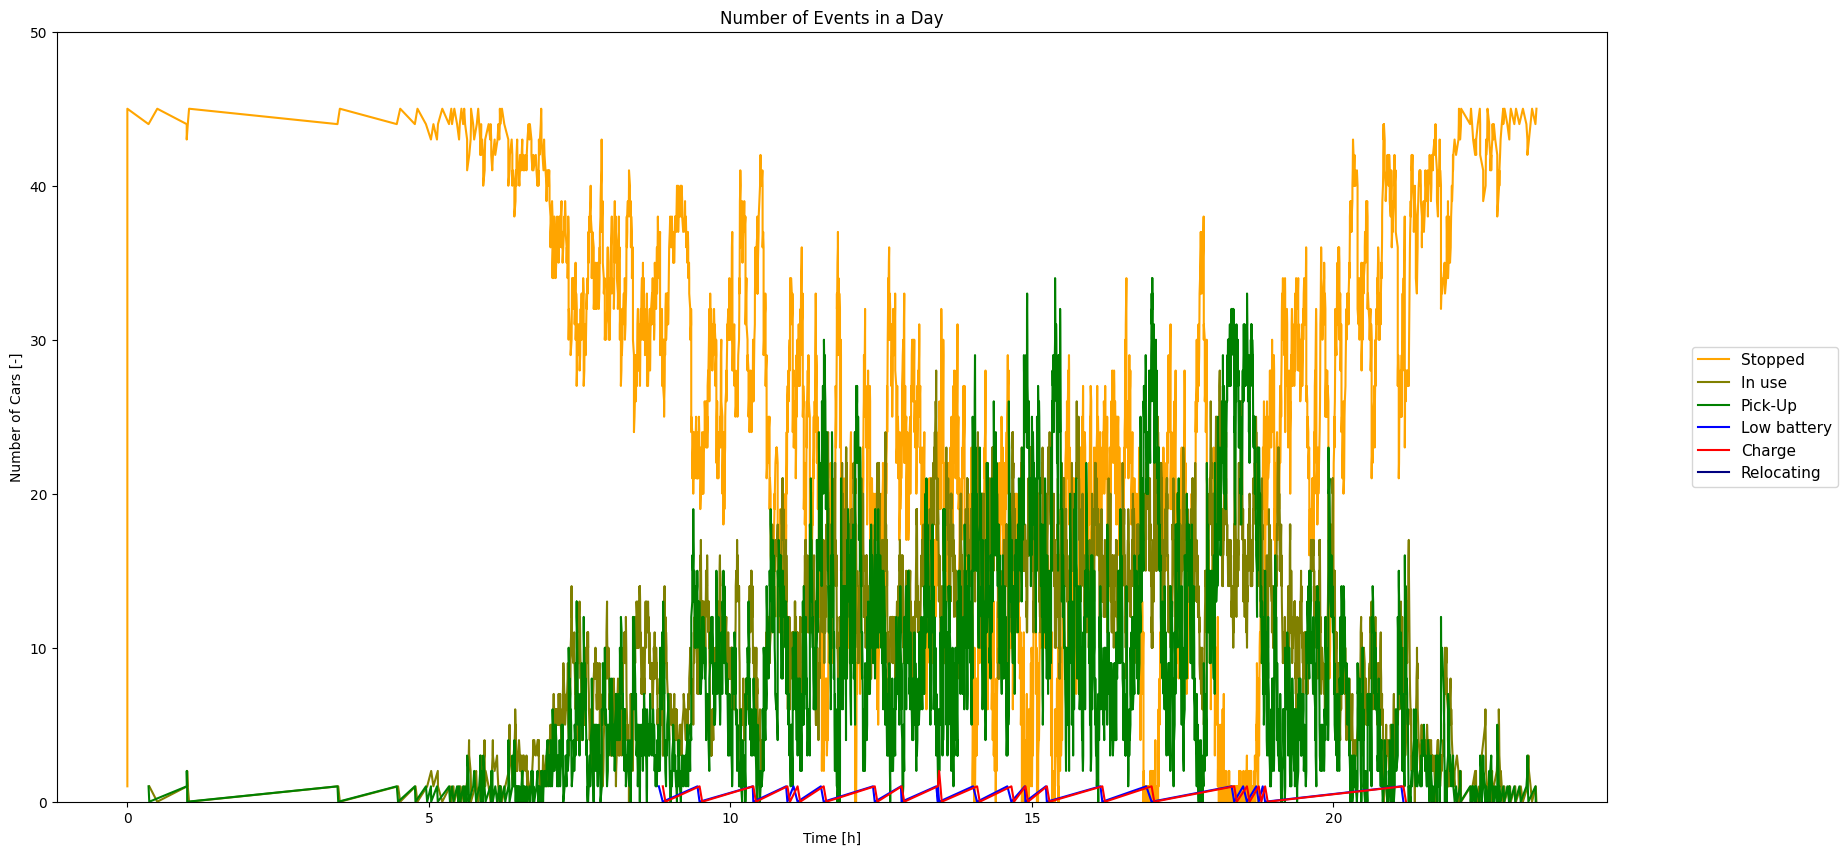

In [102]:
#Plot
plt.figure(figsize=(20,10))
plt.plot( 'Time', 'Count', data = stopped_count,   color='orange', label="Stopped")
plt.plot( 'Time', 'Count', data = inuse_count, color='olive', label="In use")
plt.plot( 'Time', 'Count', data = pickup_count,   color='green', label="Pick-Up")
# plt.plot( 'Time', 'Count', data = pickup_inuse_count,   color='purple', label="Pick-Up & In use")
plt.plot( 'Time', 'Count', data = lowfuel_count,   color='blue', label="Low battery")
plt.plot( 'Time', 'Count', data = refueling_count,   color='red', label="Charge")
plt.plot( 'Time', 'Count', data = relocating_count,   color='navy', label="Relocating")
plt.legend( loc='center left', bbox_to_anchor=(1.05, 0.5),fontsize=11)
plt.title('Number of Events in a Day')
plt.xlabel('Time [h]') 
plt.ylabel('Number of Cars [-]') 
plt.ylim(0,50)
plt.show()

# DRAFT

## Package events

In [ ]:
package_events_df=package_events_df.sort_values(by=['Num Cars','Time']).reset_index().drop('index',axis=1)

In [ ]:
for i in range(l_n_cars):
    p_trips=package_events_df[package_events_df['Num Cars']==n_cars_possible[i]]
    lp_trips=len(p_trips)

    li = list(p_trips['Agent'].value_counts())
    print("Nº packages :", len(li))

    # total_km= p_trips['Distance Traveled'].sum()/1000
    # print("Total km: ", total_km)

    # km_package=total_km/len(li)
    # print("Avg km/car: ", km_car)


    events_count = p_trips['Event'].value_counts()
    print(events_count)

    print("\n")

Nº packages : 3076
START: end                     6152
END: end                       3076
START: choosingDeliveryMode    3076
END: choosingDeliveryMode      3076
START: requesting_car          3076
END: requesting_car            3076
START: firstmile               3076
END: firstmile                 3076
START: awaiting_car            3076
END: awaiting_car              3076
START: delivering_car          3076
END: delivering_car            3076
START: lastmile                3076
END: lastmile                  3076
Name: Event, dtype: int64


Nº packages : 3076
START: end                     6152
END: end                       3076
START: choosingDeliveryMode    3076
END: choosingDeliveryMode      3076
START: requesting_car          3076
END: requesting_car            3076
START: firstmile               3076
END: firstmile                 3076
START: awaiting_car            3076
END: awaiting_car              3076
START: delivering_car          3076
END: delivering_car            307